In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from matplotlib_venn import venn2

## Prepare the input

In [2]:
bgi = pd.read_csv('input/ReadsNumb_BGI.csv', sep=' ', header=None, names=['nameS', 'reads_numb'])
ill = pd.read_csv('input/ReadsNumb_Illumina.csv')
bgi.head(2)

,nameS,reads_numb
0,CRC003,43650789
1,CRC004,79216008


Text(0.5, 1.0, 'Overlaping samples from BGI and Illumina sets')

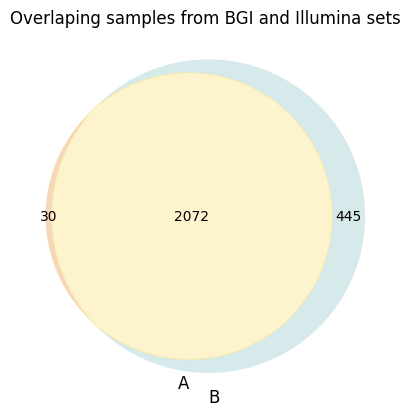

In [3]:
smpls_bgi = set(bgi['nameS'])
#smpls_bgi = set(bgi_unique['sample_name']).union(bgi2_unique['sample_name'])

smpls_illumina = set(ill['nameS'])
intersection = smpls_bgi.intersection(smpls_illumina)
bgi_only = smpls_bgi.difference(smpls_illumina)
illumina_only = smpls_illumina.difference(smpls_bgi)

v = venn2(subsets=(len(bgi_only), len(illumina_only), len(intersection)), set_colors=('#E99B53', '#99CCCD'))
v.get_patch_by_id('11').set_color('#FAE483')
plt.title('Overlaping samples from BGI and Illumina sets')

#plt.savefig('results/venn2.png', dpi=300, bbox_inches='tight')
#plt.savefig('results/venn2.svg', bbox_inches='tight')

In [4]:
mrg = pd.merge(bgi, ill, on='nameS', how='inner', suffixes=('_bgi', '_ill')) 
mrg.tail(2)

,nameS,reads_numb_bgi,reads_numb_ill
2071,VZYSJ2,41069001,13361770
2072,VZZW6V,45340689,15220991


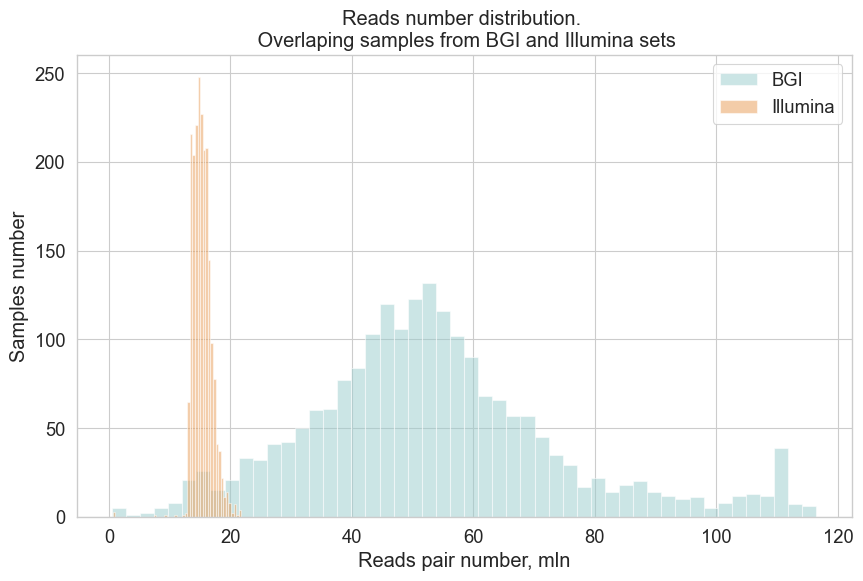

In [5]:
#plot
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.figure(figsize=(10, 6))

plt.hist(mrg['reads_numb_bgi']/1000000, bins=50, color='#99CCCD', alpha=0.5, label='BGI')
plt.hist(mrg['reads_numb_ill']/1000000, bins=50, color='#E99B53', alpha=0.5, label='Illumina')

plt.legend(loc='upper right')
plt.title('Reads number distribution. \n Overlaping samples from BGI and Illumina sets')
plt.xlabel('Reads pair number, mln')
plt.ylabel('Samples number')

plt.savefig('results/ReadsNumb_distribution.png', dpi=300, bbox_inches='tight')
#plt.savefig('results/ReadsNumb_distribution.svg', bbox_inches='tight')

In [8]:
len(mrg[mrg['reads_numb_bgi'] < mrg['reads_numb_ill']])

50

Cut the Illumina file:
- VA4LFQ
- VOPAGV
- VSX1M8

In [6]:
# drop all samples where:
# 1. reads number in BGI is less than in Illumina
# 2. reads number in Illumina is less than 13 mln
# 3. reads number in Illumina is more than 20 mln

mrg1 = mrg[(mrg['reads_numb_bgi'] > mrg['reads_numb_ill']) 
           & (mrg['reads_numb_ill'] > 13000000)
           & (mrg['reads_numb_ill'] < 20000000)].reindex()

len(mrg1)

1997

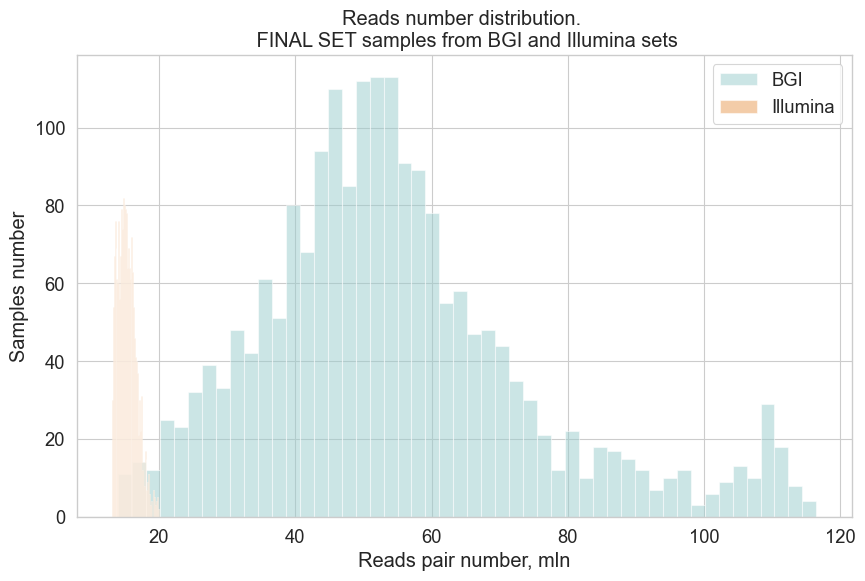

In [10]:
#plot
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))

plt.hist(mrg1['reads_numb_bgi']/1000000, bins=50, color='#99CCCD', alpha=0.5, label='BGI')
plt.hist(mrg1['reads_numb_ill']/1000000, bins=50, color='#E99B53', alpha=0.5, label='Illumina')

plt.legend(loc='upper right')
plt.title('Reads number distribution. \n FINAL SET samples from BGI and Illumina sets')
plt.xlabel('Reads pair number, mln')
plt.ylabel('Samples number')

plt.savefig('results/ReadsNumb_distribution_FS.png', dpi=300, bbox_inches='tight')

In [11]:
mrg1['nameS'].to_csv('results/FinalSet_smpls_list.csv', index=False)

Split list

In [15]:
len(mrg1)

1997

## Split final list to parallel calculations

In [17]:
mrg1['nameS'].head(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p1.csv', index=False, header=False)
mrg1['nameS'].head(400).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p2.csv', index=False, header=False)
mrg1['nameS'].head(600).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p3.csv', index=False, header=False)
mrg1['nameS'].head(800).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p4.csv', index=False, header=False)
mrg1['nameS'].head(1000).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p5.csv', index=False, header=False)
mrg1['nameS'].head(1200).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p6.csv', index=False, header=False)
mrg1['nameS'].head(1400).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p7.csv', index=False, header=False)
mrg1['nameS'].head(1600).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p8.csv', index=False, header=False)
mrg1['nameS'].head(1800).tail(200).to_csv('results/FinalSet_smpls_list_bgiCUT_p9.csv', index=False, header=False)
mrg1['nameS'].tail(197).to_csv('results/FinalSet_smpls_list_bgiCUT_p10.csv', index=False, header=False)

## Find absent Kraken results

In [6]:
fl = pd.read_csv('input/FinalSet_smpls.csv', header=None, names=['nameS'])
kra = pd.read_csv('input/bg_list.csv', sep=' ', header=None, names=['nameS'])
kra.head(2)

,nameS
0,V00H9L
1,V010T4


In [8]:
# find samples from FinalSet that are not in kra_res
fl_only = set(fl['nameS']).difference(set(kra['nameS']))    
pd.DataFrame(list(fl_only)).to_csv('results/fl_only.csv', index=False, header=False)
len(fl_only)

815

In [18]:
fl_only_df = pd.DataFrame(list(fl_only))

fl_only_df[0].head(150).to_csv('results/kra_p1.csv', index=False, header=False)
fl_only_df[0].head(300).tail(150).to_csv('results/kra_p2.csv', index=False, header=False)
fl_only_df[0].head(450).tail(300).to_csv('results/kra_p3.csv', index=False, header=False)
fl_only_df[0].head(600).tail(450).to_csv('results/kra_p4.csv', index=False, header=False)
fl_only_df[0].head(750).tail(600).to_csv('results/kra_p5.csv', index=False, header=False)
fl_only_df[0].tail(65).to_csv('results/kra_p6.csv', index=False, header=False)

In [10]:
# find samples from kra_res that are not in FinalSet
kra_only = set(kra['nameS']).difference(set(fl['nameS']))
len(kra_only)
# save to file
pd.DataFrame(list(kra_only)).to_csv('results/kra_only.csv', index=False, header=False)

In [19]:
kra_only_df = pd.DataFrame(list(kra_only))
kra_only_df[0] ='kraken_Illumina/ill_'+kra_only_df[0]+'.bracken'
kra_only_df.to_csv('results/kra_only.csv', index=False, header=False)

In [ ]:
for file in $(cat ~/kraken_Illumina/kra_only.csv); do mv "$file" ~/extra_Illumina_res; done

# check absent smpls

In [10]:
kraI = pd.read_csv('input/kra_illumina_list.csv', header=None, names=['nameS'])
kraB = pd.read_csv('input/kra_bgi_list.csv', sep=' ', header=None, names=['nameS'])
kraB.head(2)

,nameS
0,V00H9L
1,V010T4


In [11]:
print(len(kraI))
print(len(kraB))

1990
1990


In [12]:
# find samples from FinalSet that are not in kra_res
kraB_only = set(kraB['nameS']).difference(set(kraI['nameS']))    
#pd.DataFrame(list(kraB_only)).to_csv('results/fl_only.csv', index=False, header=False)
kraB_only

set()

In [13]:
# find samples from FinalSet that are not in kra_res
kraI_only = set(kraI['nameS']).difference(set(kraB['nameS']))    
#pd.DataFrame(list(kraB_only)).to_csv('results/fl_only.csv', index=False, header=False)
kraI_only

set()

'VQBTKX', 'VR4UUJ' - has 0 reads files in BGI set

VLD38Y also has 0 reads file in cut BGI set